# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [9]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [7]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  int32  
 4   used_chip                       1000000 non-null  int32  
 5   used_pin_number                 1000000 non-null  int32  
 6   online_order                    1000000 non-null  int32  
 7   fraud                           1000000 non-null  int32  
dtypes: float64(3), int32(5)
memory usage: 42.0 MB


In [6]:
fraud.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [5]:
columns_to_convert = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']
fraud[columns_to_convert] = fraud[columns_to_convert].astype('int')

In [8]:
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [ ]:
# - **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
# looking at the plot below we can definitely say that we are dealing with an imbalance dataset. 


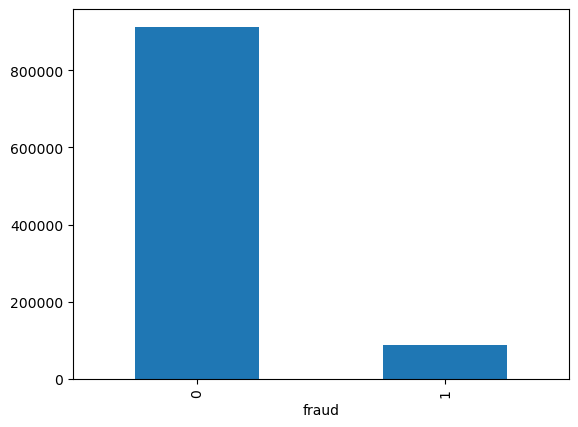

In [10]:
fraud_col = fraud['fraud'].value_counts()
fraud_col.plot(kind  = 'bar')
plt.show()

In [ ]:
# - **2.** Train a LogisticRegression.

In [12]:
features = fraud.drop(columns = ['fraud'])
target = fraud['fraud']

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
log_reg = LogisticRegression()

In [17]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# - **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.

In [18]:
log_reg.score(X_test_scaled, y_test)

0.958568

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [22]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98    228128
           1       0.89      0.60      0.72     21872

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.95    250000



In [ ]:
# - **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 

In [23]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [24]:
train['fraud'] = y_train.values

In [25]:
fraud = train[train['fraud'] == 1]
no_fraud = train[train['fraud'] == 0]

In [26]:
from sklearn.utils import resample

In [27]:
yes_diabetes_oversampled = resample(fraud, 
                                    replace=True, 
                                    n_samples = len(no_fraud),
                                    random_state=0)

In [28]:
train_over = pd.concat([yes_diabetes_oversampled, no_fraud])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
30457,1.168624,-0.219530,-0.201637,0.366694,-0.734111,-0.334433,0.732211,1
501195,-0.231731,-0.217918,1.213791,0.366694,1.362191,-0.334433,0.732211,1
490938,0.129475,-0.165052,1.190194,0.366694,-0.734111,-0.334433,0.732211,1
602377,-0.299319,1.460426,3.339573,0.366694,-0.734111,-0.334433,0.732211,1
526835,1.137631,-0.211864,-0.353392,0.366694,-0.734111,-0.334433,0.732211,1
...,...,...,...,...,...,...,...,...
749994,-0.334011,-0.207106,-0.417573,0.366694,-0.734111,-0.334433,-1.365727,0
749996,0.058312,-0.139051,-0.387523,0.366694,-0.734111,-0.334433,0.732211,0
749997,-0.112224,-0.187459,-0.212737,0.366694,-0.734111,-0.334433,0.732211,0
749998,-0.380620,-0.221070,-0.546212,-2.727072,1.362191,-0.334433,-1.365727,0


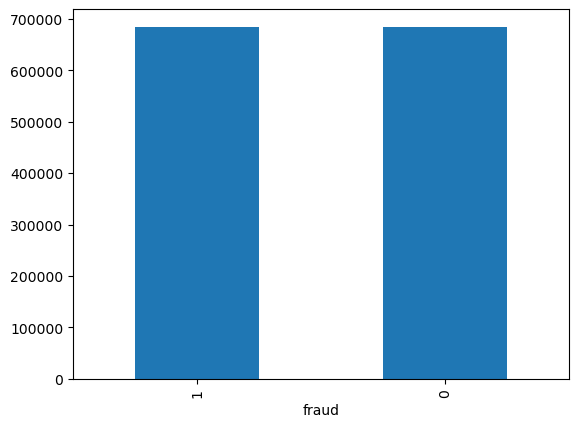

In [29]:
fraud_plt = train_over['fraud'].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [30]:
X_train_over = train_over.drop(columns = ['fraud'])
y_train_over = train_over['fraud']

In [31]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [32]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

c:\Users\igrav\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.99      0.93      0.96    228128
           1       0.57      0.95      0.72     21872

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



              precision    recall  f1-score   support

           0       0.96      0.99      0.98    228128
           1       0.89      0.60      0.72     21872

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.95    250000

In [ ]:
# - **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

In [33]:
train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,-0.375935,0.248162,-0.231029,-2.727072,-0.734111,-0.334433,-1.365727,0
1,0.060608,0.402852,-0.272181,0.366694,-0.734111,-0.334433,-1.365727,0
2,-0.383147,-0.218779,-0.357697,-2.727072,-0.734111,2.990131,0.732211,0
3,0.084453,-0.060610,-0.362881,0.366694,1.362191,-0.334433,0.732211,0
4,-0.392413,-0.200444,-0.364117,-2.727072,-0.734111,-0.334433,0.732211,0
...,...,...,...,...,...,...,...,...
749995,0.119275,-0.167132,0.938737,0.366694,-0.734111,-0.334433,0.732211,1
749996,0.058312,-0.139051,-0.387523,0.366694,-0.734111,-0.334433,0.732211,0
749997,-0.112224,-0.187459,-0.212737,0.366694,-0.734111,-0.334433,0.732211,0
749998,-0.380620,-0.221070,-0.546212,-2.727072,1.362191,-0.334433,-1.365727,0


In [34]:
no_diabetes_undersampled = resample(no_fraud, 
                                    replace=False, 
                                    n_samples = len(fraud),
                                    random_state=0)
no_diabetes_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
358259,-0.329997,-0.203055,-0.291425,0.366694,-0.734111,-0.334433,0.732211,0
335889,-0.171301,1.656147,-0.597467,0.366694,-0.734111,-0.334433,0.732211,0
71078,-0.340244,-0.083252,-0.447097,0.366694,-0.734111,-0.334433,0.732211,0
549720,-0.152613,-0.165999,-0.326703,0.366694,1.362191,-0.334433,0.732211,0
593118,-0.257737,-0.115846,0.605612,0.366694,-0.734111,-0.334433,-1.365727,0
...,...,...,...,...,...,...,...,...
723856,-0.244896,-0.220672,-0.240715,0.366694,-0.734111,-0.334433,-1.365727,0
288907,-0.261212,-0.213947,-0.050485,0.366694,-0.734111,-0.334433,-1.365727,0
316801,-0.310216,-0.207547,-0.389293,0.366694,1.362191,-0.334433,-1.365727,0
155893,1.009956,-0.219090,0.257550,0.366694,-0.734111,-0.334433,0.732211,0


In [35]:
train_under = pd.concat([no_diabetes_undersampled, fraud])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
358259,-0.329997,-0.203055,-0.291425,0.366694,-0.734111,-0.334433,0.732211,0
335889,-0.171301,1.656147,-0.597467,0.366694,-0.734111,-0.334433,0.732211,0
71078,-0.340244,-0.083252,-0.447097,0.366694,-0.734111,-0.334433,0.732211,0
549720,-0.152613,-0.165999,-0.326703,0.366694,1.362191,-0.334433,0.732211,0
593118,-0.257737,-0.115846,0.605612,0.366694,-0.734111,-0.334433,-1.365727,0
...,...,...,...,...,...,...,...,...
749940,1.850301,-0.150472,1.037921,0.366694,-0.734111,-0.334433,0.732211,1
749958,3.649104,0.973236,-0.294221,0.366694,-0.734111,-0.334433,0.732211,1
749962,1.266396,-0.106570,0.940871,0.366694,1.362191,-0.334433,-1.365727,1
749972,1.927917,-0.169170,0.816173,0.366694,1.362191,-0.334433,-1.365727,1


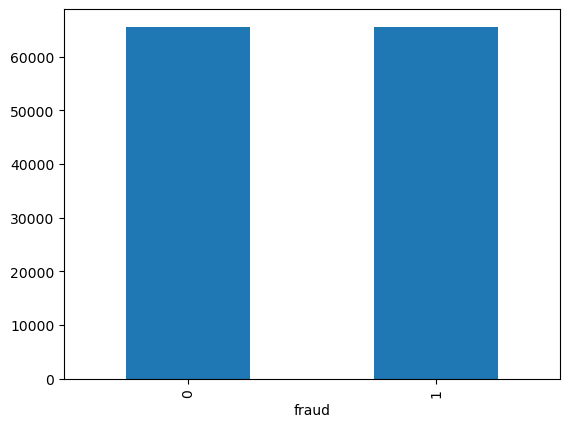

In [36]:
fraud_plt = train_under['fraud'].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [37]:
X_train_under = train_under.drop(columns = ['fraud'])
y_train_under = train_under['fraud']

In [39]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [40]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

c:\Users\igrav\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.93      0.96    228128
           1       0.57      0.95      0.72     21872

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [ ]:
# - **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [43]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [44]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [45]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96    228128
           1       0.57      0.95      0.72     21872

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



SMOTE 

precision    recall  f1-score   support

           0       0.99      0.93      0.96    228128
           1       0.57      0.95      0.72     21872

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

OVERSAMPLE

precision    recall  f1-score   support

           0       0.99      0.93      0.96    228128
           1       0.57      0.95      0.72     21872

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

UNDERSAMPLE

precision    recall  f1-score   support

           0       1.00      0.93      0.96    228128
           1       0.57      0.95      0.72     21872

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

STANDART

precision    recall  f1-score   support

           0       0.96      0.99      0.98    228128
           1       0.89      0.60      0.72     21872

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.95    250000